In [1]:
import numpy as np
from scipy import io

In [2]:
att_splits=io.loadmat('binaryAtt_splits.mat')
class_list=[]
classes = att_splits['allclasses_names']
for i in range(classes.shape[0]):
    class_list.append(classes[i][0][0])
att_dict=dict(zip(class_list, att_splits['att'].transpose()))

In [3]:
res101=io.loadmat('../../resnet-feats/AWA2/res101.mat')
train_loc = 'train_loc'
val_loc = 'val_loc'
test_loc = 'test_unseen_loc'

train_classes=res101['labels'][np.squeeze(att_splits[train_loc]-1)]
val_classes = res101['labels'][np.squeeze(att_splits[val_loc]-1)]
test_classes = res101['labels'][np.squeeze(att_splits[test_loc]-1)]

In [4]:
class_dict=dict(zip(np.arange(1,51),class_list))
train_count_dict={}
for i in range(train_classes.shape[0]):
    if class_dict[train_classes[i][0]] not in train_count_dict:
        train_count_dict[class_dict[train_classes[i][0]]]=1
    else:
        train_count_dict[class_dict[train_classes[i][0]]]+=1

val_count_dict={}
for i in range(val_classes.shape[0]):
    if class_dict[val_classes[i][0]] not in val_count_dict:
        val_count_dict[class_dict[val_classes[i][0]]]=1
    else:
        val_count_dict[class_dict[val_classes[i][0]]]+=1
        
test_count_dict={}
for i in range(test_classes.shape[0]):
    if class_dict[test_classes[i][0]] not in test_count_dict:
        test_count_dict[class_dict[test_classes[i][0]]]=1
    else:
        test_count_dict[class_dict[test_classes[i][0]]]+=1

In [7]:
train_count_dict

{u'antelope': 1046,
 u'buffalo': 895,
 u'chihuahua': 567,
 u'collie': 1028,
 u'cow': 1338,
 u'elephant': 1038,
 u'fox': 664,
 u'german+shepherd': 1033,
 u'grizzly+bear': 852,
 u'hippopotamus': 684,
 u'humpback+whale': 709,
 u'killer+whale': 291,
 u'lion': 1019,
 u'mouse': 185,
 u'otter': 758,
 u'persian+cat': 747,
 u'pig': 713,
 u'polar+bear': 868,
 u'rhinoceros': 696,
 u'siamese+cat': 500,
 u'skunk': 188,
 u'spider+monkey': 291,
 u'squirrel': 1200,
 u'tiger': 877,
 u'weasel': 272,
 u'wolf': 589,
 u'zebra': 1170}

In [6]:
val_count_dict

{u'beaver': 193,
 u'chimpanzee': 728,
 u'dalmatian': 549,
 u'deer': 1344,
 u'giant+panda': 874,
 u'gorilla': 872,
 u'hamster': 779,
 u'leopard': 720,
 u'mole': 100,
 u'moose': 704,
 u'ox': 728,
 u'rabbit': 1088,
 u'raccoon': 512}

In [8]:
test_count_dict

{u'bat': 383,
 u'blue+whale': 174,
 u'bobcat': 630,
 u'dolphin': 946,
 u'giraffe': 1202,
 u'horse': 1645,
 u'rat': 310,
 u'seal': 988,
 u'sheep': 1420,
 u'walrus': 215}

In [9]:
train_att_mat = np.zeros((85,27))
for i,c in enumerate(train_count_dict):
    for j in range(len(att_dict[c])):
        train_att_mat[j,i]=train_count_dict[c]*float(att_dict[c][j])

test_att_mat = np.array([att_dict[c] for c in test_count_dict]).transpose()

In [10]:
corr_train = np.corrcoef(train_att_mat)
nans = np.isnan(corr_train)
corr_train[nans] = 0
corr_test = np.corrcoef(test_att_mat)
nans = np.isnan(corr_test)
corr_test[nans] = 0
def diff_corr(corr_train, corr_test):
    dis_corr = (corr_train - corr_test)
    dis_corr = np.sign(corr_train)*dis_corr
    return dis_corr.clip(0,np.inf)
dis_corr = diff_corr(corr_train, corr_test)

/Users/saneem/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/saneem/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [11]:
dis_corr_triu = np.triu(dis_corr,1)
loc = np.unravel_index(np.argsort(-dis_corr_triu, axis=None)[:100], dis_corr_triu.shape)
dis_corr_triu[loc]

array([1.37847377, 1.24887192, 1.2421683 , 1.20601026, 1.1883171 ,
       1.18100405, 1.16582975, 1.16143832, 1.14575675, 1.13895492,
       1.13832586, 1.1274922 , 1.1223745 , 1.12071744, 1.11087316,
       1.0982961 , 1.09686648, 1.09410581, 1.08511151, 1.08426758,
       1.08028735, 1.07675972, 1.0663944 , 1.06163522, 1.05955693,
       1.05490645, 1.05406105, 1.05227472, 1.04615403, 1.04296247,
       1.03340746, 1.02869041, 1.0243094 , 1.01321552, 1.00751451,
       1.00051293, 1.        , 0.9937323 , 0.98760194, 0.9761702 ,
       0.9713637 , 0.9706541 , 0.94761049, 0.94013498, 0.93362923,
       0.93316475, 0.91824749, 0.91284115, 0.90939682, 0.90907395,
       0.90622544, 0.90081979, 0.89597616, 0.89584101, 0.89404109,
       0.89321142, 0.89155743, 0.88731698, 0.87742519, 0.87528326,
       0.8750126 , 0.87017908, 0.86387514, 0.8612793 , 0.86097501,
       0.8605545 , 0.86026655, 0.86018638, 0.85943516, 0.85712408,
       0.85382184, 0.85235935, 0.85109344, 0.85055855, 0.85027

In [12]:
dis_corr.mean()

0.1754126830106494

In [13]:
text_file = open(u'predicates.txt', "r").readlines()
predicates = [x.strip().split('\t')[1] for x in text_file]
print(predicates[3], predicates[11])

('brown', 'furry')


-------------
<br><br>
### New splits with more correlation shift

In [14]:
class_count_dict = {}
class_count_dict.update(train_count_dict)
class_count_dict.update(val_count_dict)
class_count_dict.update(test_count_dict)

In [15]:
def diff_corr(corr_train, corr_test):
    dis_corr = (corr_train - corr_test)
    dis_corr = np.sign(corr_train)*dis_corr
    return dis_corr.clip(0,np.inf)

In [35]:
def get_corr_shift(class_count_dict, att_dict, train_class, test_class):
    test_att_mat = []
    train_att_mat = []
    for cls in test_class:
        test_att_mat.extend([att_dict[cls]]*class_count_dict[cls])
    for cls in train_class:
        train_att_mat.extend([att_dict[cls]]*class_count_dict[cls])
    train_att_mat = np.array(train_att_mat).transpose()
    test_att_mat = np.array(test_att_mat).transpose()
    
#     print train_att_mat.shape
#     print test_att_mat.shape
    corr_train = np.corrcoef(train_att_mat)
    corr_train[np.isnan(corr_train)] = 0.
    corr_test = np.corrcoef(test_att_mat)
    corr_test[np.isnan(corr_test)] = 0.
    
    dis_corr = diff_corr(corr_train, corr_test)
    
    # correlation shift score: 
    # 1) mean
    # corr_shift_score = np.mean(dis_corr)
    
    # 2) average of top n%
    dis_corr_array = dis_corr.flatten()
    top_percentage = 50
    num_elements = int((top_percentage/100.)*len(dis_corr_array))
    corr_shift_score = np.mean(dis_corr_array[np.argsort(dis_corr_array)[-num_elements:]])
    
    return corr_shift_score

In [17]:
selected_classes = []
remaining_classes = class_count_dict.keys()
for i in range(10):
    best_cls = ''
    best_score = -1.
    for cls in remaining_classes:
        new_sel = selected_classes[:]
        new_sel.append(cls)
        new_rem = remaining_classes[:]
        new_rem.remove(cls)
        shift_score = get_corr_shift(class_count_dict, att_dict, new_rem, new_sel)
        if shift_score > best_score:
            best_score = shift_score
            best_cls = cls
    selected_classes.append(best_cls)
    remaining_classes.remove(best_cls)
    print str(i+1) + ') ' + selected_classes[-1] + ' -> ' + str(best_score)

test_set = selected_classes[:]
train_val = remaining_classes[:]

1) giant+panda -> 0.3233002220967285
2) bat -> 0.4886939098744928
3) killer+whale -> 0.5242728603159342
4) mole -> 0.5064746919731691
5) skunk -> 0.48680739559277014
6) mouse -> 0.47367739205107057
7) weasel -> 0.4563231909419608
8) rat -> 0.4454602641235778
9) squirrel -> 0.4345784393529316
10) german+shepherd -> 0.42765332369222586


In [18]:
selected_classes = []
remaining_classes = train_val[:]
for i in range(13):
    best_cls = ''
    best_score = -1.
    for cls in remaining_classes:
        new_sel = selected_classes[:]
        new_sel.append(cls)
        new_rem = remaining_classes[:]
        new_rem.remove(cls)
        shift_score = get_corr_shift(class_count_dict, att_dict, new_rem, test_set)
        if shift_score > best_score:
            best_score = shift_score
            best_cls = cls
    selected_classes.append(best_cls)
    remaining_classes.remove(best_cls)
    print str(i+1) + ') ' + selected_classes[-1] + ' -> ' + str(best_score)
train_set = remaining_classes[:]
val_set = selected_classes[:]

1) rabbit -> 0.43170713286136303
2) sheep -> 0.4374987343090049
3) seal -> 0.4443838591105511
4) dolphin -> 0.4497282445471947
5) walrus -> 0.45316808252446583
6) humpback+whale -> 0.45787289058961794
7) collie -> 0.46167035529028144
8) dalmatian -> 0.46690979464250465
9) chihuahua -> 0.4712205439205069
10) tiger -> 0.47357937268427974
11) buffalo -> 0.4761565533655559
12) wolf -> 0.479172709137453
13) raccoon -> 0.4830754551757127


In [36]:
print get_corr_shift(class_count_dict, att_dict, train_set, test_set)
print get_corr_shift(class_count_dict, att_dict, train_set, val_set)

0.4830754551757127
0.3849257272402955


In [37]:
print get_corr_shift(class_count_dict, att_dict, train_count_dict.keys(), test_count_dict.keys())
print get_corr_shift(class_count_dict, att_dict, train_count_dict.keys(), val_count_dict.keys())

0.3190513405454516
0.3603091738962022


In [33]:
sum([class_count_dict[x] for x in train_set]) + sum([class_count_dict[x] for x in val_set])

32486

In [34]:
sum([class_count_dict[x] for x in test_set])

4836

In [24]:
split_dict = {}
split_dict['train_cls'] = train_set
split_dict['val_cls'] = val_set
split_dict['test_cls'] = test_set

import pickle
with open('awa_cs_split.npy', 'wb') as fp:
    np.save(fp, split_dict)

In [27]:
sd = np.load('awa_cs_split.npy', allow_pickle=True)
sd.item()

{'test_cls': [u'giant+panda',
  u'bat',
  u'killer+whale',
  u'mole',
  u'skunk',
  u'mouse',
  u'weasel',
  u'rat',
  u'squirrel',
  u'german+shepherd'],
 'train_cls': [u'antelope',
  u'blue+whale',
  u'deer',
  u'pig',
  u'grizzly+bear',
  u'beaver',
  u'hippopotamus',
  u'fox',
  u'rhinoceros',
  u'elephant',
  u'moose',
  u'bobcat',
  u'persian+cat',
  u'siamese+cat',
  u'leopard',
  u'horse',
  u'chimpanzee',
  u'giraffe',
  u'otter',
  u'polar+bear',
  u'cow',
  u'spider+monkey',
  u'lion',
  u'gorilla',
  u'hamster',
  u'ox',
  u'zebra'],
 'val_cls': [u'rabbit',
  u'sheep',
  u'seal',
  u'dolphin',
  u'walrus',
  u'humpback+whale',
  u'collie',
  u'dalmatian',
  u'chihuahua',
  u'tiger',
  u'buffalo',
  u'wolf',
  u'raccoon']}

<br>
<br>
<br>
------------
### Attribute importance by looking at test set

In [110]:
test_prior_matrix = []
for cls in test_count_dict.keys():
    test_prior_matrix.append(att_dict[cls])
test_prior_matrix = np.array(test_prior_matrix)

In [168]:
def att_importance(cls_num, test_prior_matrix):
    y = np.zeros(test_prior_matrix.shape[0])
    y[cls_num] = 1
    p = softmax(np.matmul(test_prior_matrix[cls_num], test_prior_matrix.transpose())*1.0)
    return np.matmul(p - y, test_prior_matrix)

In [132]:
from scipy.special import softmax

In [114]:
cls_num = 2
cls_vec = np.zeros(test_prior_matrix.shape[0])
cls_vec[cls_num] = 1

In [127]:
test_prior_matrix[cls_num].shape

(85,)

In [128]:
test_prior_matrix.shape

(10, 85)

In [138]:
s = np.matmul(test_prior_matrix[cls_num], test_prior_matrix.transpose())*1.0

In [139]:
softmax(s)

array([7.57217948e-10, 1.52091291e-08, 9.98630945e-01, 1.23240849e-04,
       1.12381108e-07, 2.05833179e-09, 4.13426992e-08, 9.10633549e-04,
       5.59512590e-09, 3.35003361e-04])

In [176]:
weights = att_importance(4, test_prior_matrix)

In [171]:
np.argsort(weights)

array([42, 72, 16, 40, 47, 84,  1, 11,  0, 62, 57, 20, 79, 54, 26, 81, 70,
       74, 68, 38, 45, 33, 63,  6, 10, 66, 19, 35, 60, 53,  2, 61, 21, 32,
       29, 64, 65, 18, 36, 51, 75, 73, 71, 44, 34, 76, 77, 12, 37, 22, 82,
       55, 48, 59, 69, 78, 31, 52, 56, 83, 49, 27, 15, 58, 30, 67,  5,  7,
        9, 13, 28, 50,  4, 80, 24,  8, 23, 14, 41, 43, 25, 17, 46,  3, 39])

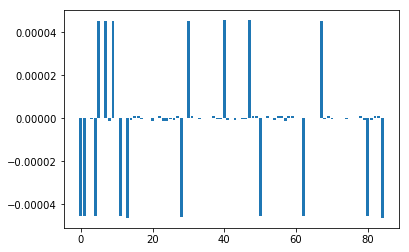

In [177]:
import matplotlib.pyplot as plt
plt.bar(range(85),weights)
plt.show()

In [163]:
test_count_dict.keys()[0]

u'sheep'

In [160]:
test_count_dict.keys()

[u'sheep',
 u'bat',
 u'blue+whale',
 u'dolphin',
 u'horse',
 u'rat',
 u'giraffe',
 u'seal',
 u'bobcat',
 u'walrus']

In [155]:
cat predicates.txt

     1	black
     2	white
     3	blue
     4	brown
     5	gray
     6	orange
     7	red
     8	yellow
     9	patches
    10	spots
    11	stripes
    12	furry
    13	hairless
    14	toughskin
    15	big
    16	small
    17	bulbous
    18	lean
    19	flippers
    20	hands
    21	hooves
    22	pads
    23	paws
    24	longleg
    25	longneck
    26	tail
    27	chewteeth
    28	meatteeth
    29	buckteeth
    30	strainteeth
    31	horns
    32	claws
    33	tusks
    34	smelly
    35	flys
    36	hops
    37	swims
    38	tunnels
    39	walks
    40	fast
    41	slow
    42	strong
    43	weak
    44	muscle
    45	bipedal
    46	quadrapedal
    47	active
    48	inactive
    49	nocturnal
    50	hibernate
    51	agility
    52	fish
    53	meat
    54	plankton
    55	vegetation
    56	insects
    57	forager
    58	grazer
    59	hunter
    60	scavenger
    61	skimmer
    62	stalker
    63	newworld
    64	oldworld
    65	arctic
    66	coastal
    67	desert
    68	bush
    69	plains
    70	forest
    7

In [178]:
for i in range(10):
    weights = att_importance(i, test_prior_matrix)
    print test_count_dict.keys()[i], np.mean(weights)

sheep 0.0009011936377918655
bat -2.1535645599430375e-08
blue+whale 1.8538881403016126e-05
dolphin 0.0009005049376776564
horse -1.5974899245290509e-06
rat -1.467983527378678e-09
giraffe 3.2149751815621104e-05
seal -1.9605352098004134e-05
bobcat 1.1743749805114328e-06
walrus 7.558287260720528e-06


In [187]:
85 - (np.matmul(test_prior_matrix, test_prior_matrix.transpose()) + np.matmul(1 - test_prior_matrix, 1 - test_prior_matrix.transpose()))

array([[ 0, 40, 37, 35, 21, 36, 24, 35, 42, 35],
       [40,  0, 47, 39, 39, 26, 48, 39, 30, 41],
       [37, 47,  0, 16, 38, 49, 37, 16, 45, 16],
       [35, 39, 16,  0, 24, 43, 35, 12, 41, 20],
       [21, 39, 38, 24,  0, 31, 17, 30, 37, 36],
       [36, 26, 49, 43, 31,  0, 44, 41, 22, 45],
       [24, 48, 37, 35, 17, 44,  0, 37, 36, 39],
       [35, 39, 16, 12, 30, 41, 37,  0, 41, 18],
       [42, 30, 45, 41, 37, 22, 36, 41,  0, 51],
       [35, 41, 16, 20, 36, 45, 39, 18, 51,  0]], dtype=uint8)

In [193]:
cls_num = 0
y = np.zeros(test_prior_matrix.shape[0])
y[cls_num] = 1
p = softmax(np.matmul(test_prior_matrix[cls_num], test_prior_matrix.transpose())*1.0)

In [194]:
p

array([9.92952102e-01, 6.10090857e-06, 1.11742038e-07, 1.11742038e-07,
       6.69045863e-03, 1.65839889e-05, 3.33098321e-04, 8.25668189e-07,
       3.03746352e-07, 3.03746352e-07])

In [199]:
x = np.matmul(test_prior_matrix, test_prior_matrix.transpose())

In [203]:
x.mean(axis=0)/ np.sum(test_prior_matrix, axis=1)

array([0.51304348, 0.45128205, 0.51785714, 0.58846154, 0.55588235,
       0.46486486, 0.49032258, 0.57      , 0.45142857, 0.51785714])

In [204]:
np.sum(test_prior_matrix, axis=1)

array([23, 39, 28, 26, 34, 37, 31, 30, 35, 28], dtype=uint64)

In [206]:
x.sum(axis=0)

array([118, 176, 145, 153, 189, 172, 152, 171, 158, 145], dtype=uint64)

In [227]:
[att_dict['bat']]*2

[array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       dtype=uint8),
 array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0],
       dtype=uint8)]